In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
df1 = sns.load_dataset('tips')

In [3]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Univariate Analysis

### Categorical Data

1. Bar Graph
2. Pie Chart

### Numerical Data

1. Distplot
2. Kdeplot
3. Histogram
4. Boxplot
5. Violinplot


# 1. Bar Graph

In [4]:
df1['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

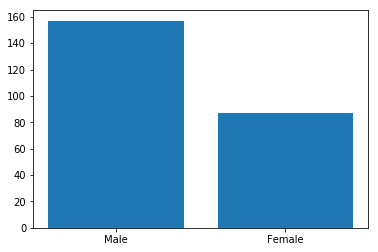

In [5]:
plt.bar(df1['sex'].value_counts().index ,df1['sex'].value_counts().values)
plt.show()

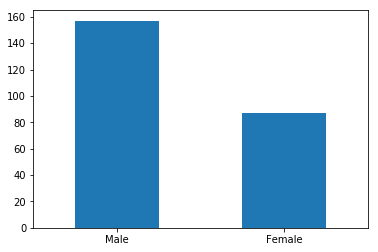

In [7]:
df1['sex'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

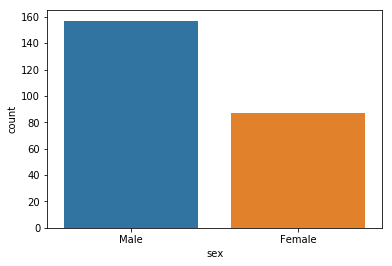

In [8]:
sns.countplot(df1['sex'])
plt.show()

# 2. Pie Chart

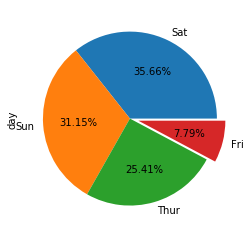

In [12]:
df1['day'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0,0,0.1])
plt.show()

# Q. Create a subplot for Smoker column.
1. Bar graph
2. Pie chart.

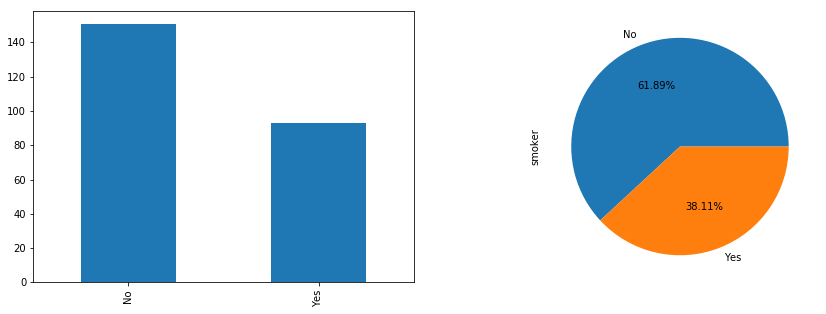

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
df1['smoker'].value_counts().plot(kind='bar',ax=axes[0])
df1['smoker'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1])
plt.show()

# 3. Histogram

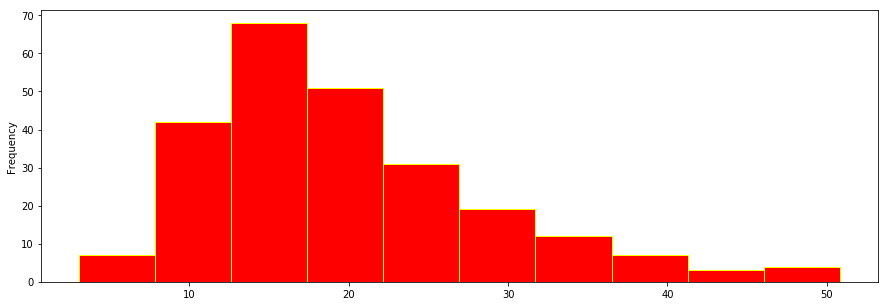

In [19]:
plt.figure(figsize=(15,5))
df1['total_bill'].plot(kind='hist',edgecolor='yellow',color='red')
plt.show()

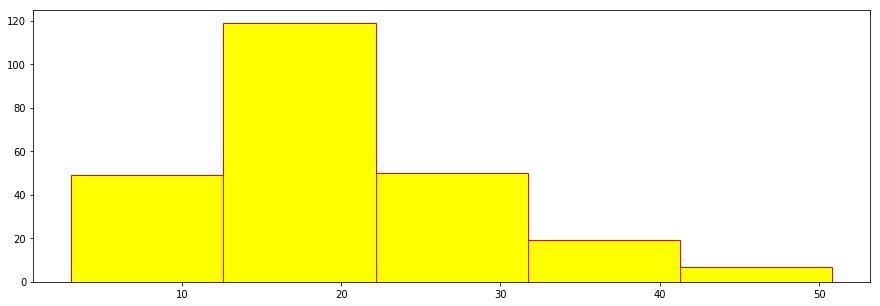

In [23]:
plt.figure(figsize=(15,5))
plt.hist(df1['total_bill'],edgecolor='red',color='yellow',bins=5)
plt.show()

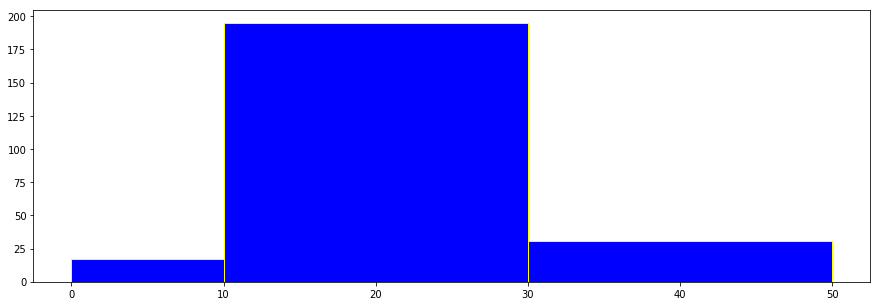

In [28]:
plt.figure(figsize=(15,5))
plt.hist(df1['total_bill'],edgecolor='yellow',color='blue',bins=[0,10,30,50])
plt.show()

In [30]:
df1.shape[0]

244

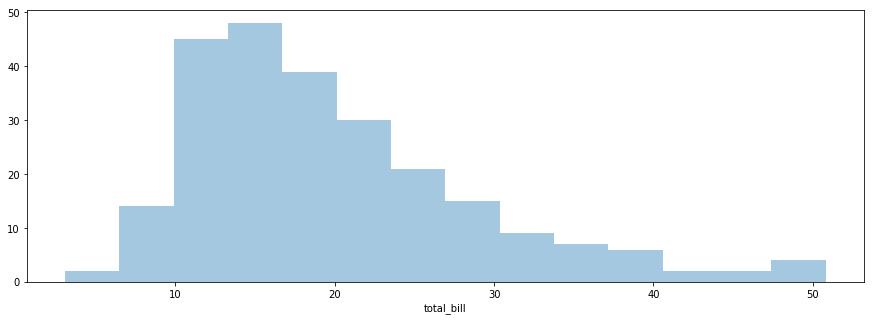

In [32]:
plt.figure(figsize=(15,5))
sns.distplot(df1['total_bill'],kde=False)
plt.show()

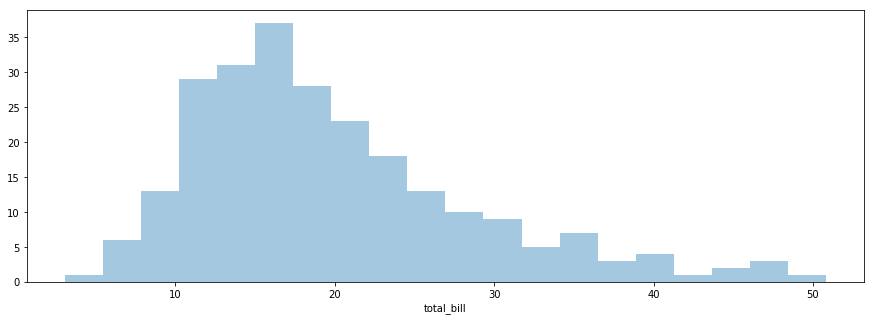

In [33]:
plt.figure(figsize=(15,5))
sns.distplot(df1['total_bill'],kde=False,bins=20)
plt.show()

# 4. Distplot

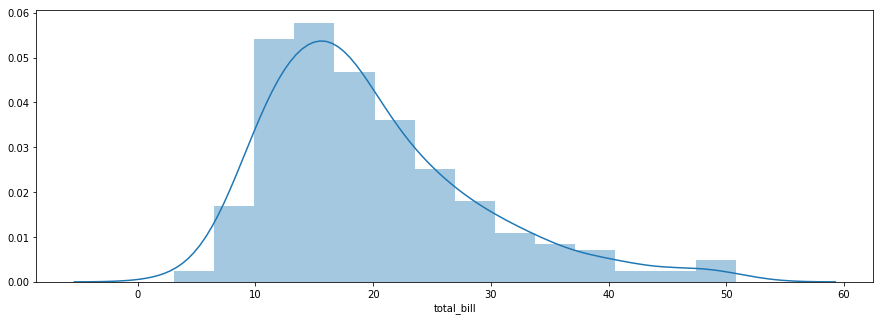

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(df1['total_bill'])
plt.show()

In [36]:
print("Skewness for total bill is",round(df1['total_bill'].skew(),2))

Skewness for total bill is 1.13


# Hence, Total Bill is Right Skewed.

# 5. KDE Plot

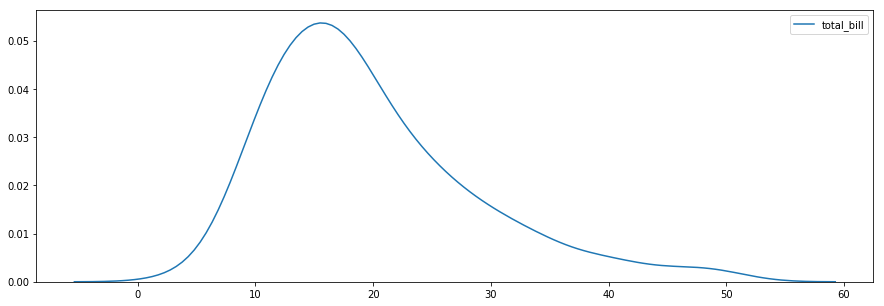

In [38]:
plt.figure(figsize=(15,5))
sns.kdeplot(df1['total_bill'])
plt.show()

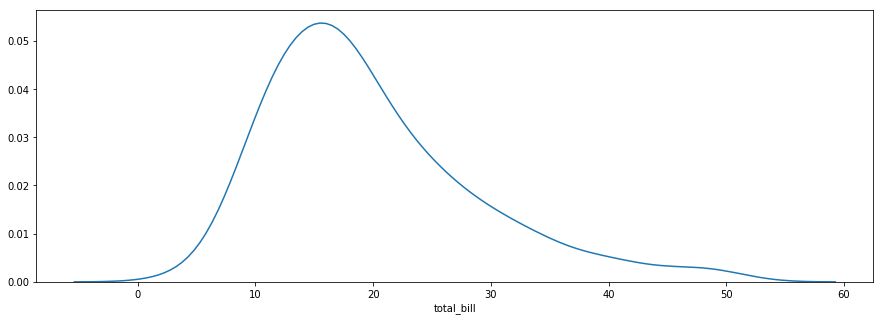

In [39]:
plt.figure(figsize=(15,5))
sns.distplot(df1['total_bill'],hist=False)
plt.show()

# 6. Boxplot

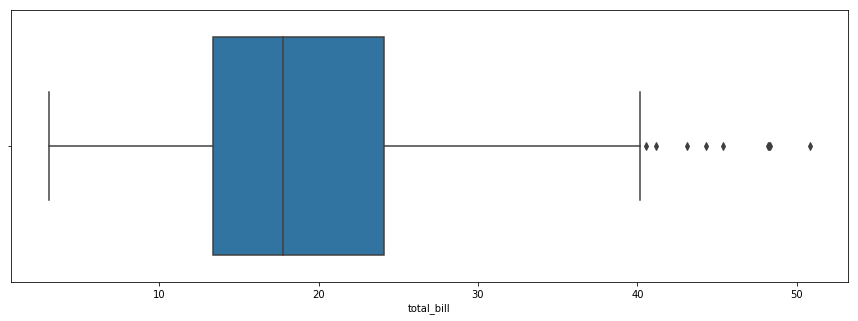

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(df1['total_bill'])
plt.show()

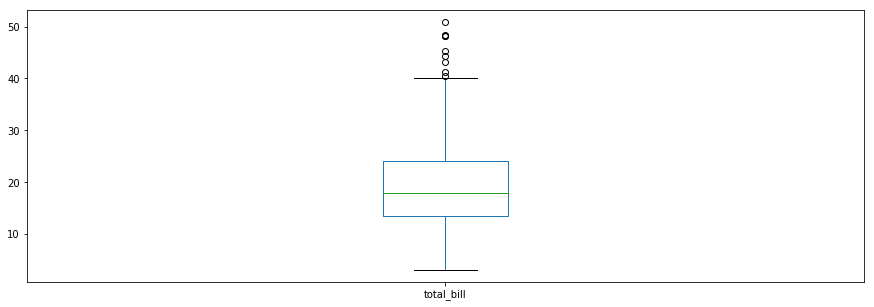

In [41]:
plt.figure(figsize=(15,5))
df1['total_bill'].plot(kind='box')
plt.show()

In [46]:
q1 = df1['total_bill'].quantile(0.25)
q2 = df1['total_bill'].quantile(0.5)
q3 = df1['total_bill'].quantile(0.75)
IQR = q3 - q1
print('Q1 is ',round(q1,2))
print('Q2 is ',round(q2,2))
print('Q3 is ',round(q3,2))
print('IQR is ',round(IQR,2))

Q1 is  13.35
Q2 is  17.8
Q3 is  24.13
IQR is  10.78


# 7. Violinplot

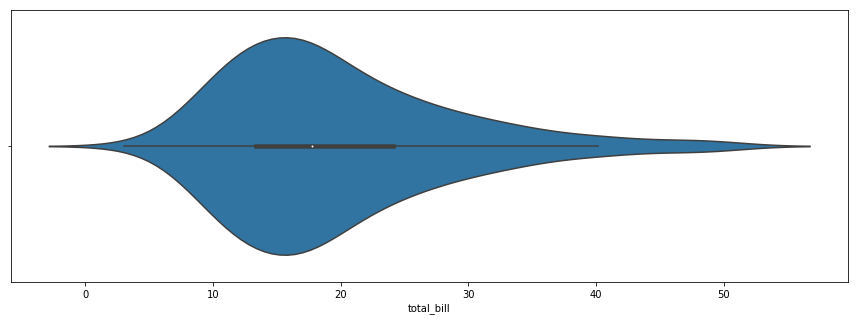

In [47]:
plt.figure(figsize=(15,5))
sns.violinplot(df1['total_bill'])
plt.show()

# Handling Categorical Data

1. Label Encoding
2. One - Hot Encoding
3. Frequency Encoding

## 1. Label Encoding

In [48]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
df1['sex_LE1'] = df1['sex'].map({'Male':1,'Female':0})
df1['sex_LE2'] = df1['sex'].replace({'Male':1,'Female':0})

In [50]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,sex_LE1,sex_LE2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
LE = LabelEncoder()

In [53]:
df1['Day LE'] = LE.fit_transform(df1['day'])

In [54]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,sex_LE1,sex_LE2,Day LE
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2


In [55]:
df1['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [56]:
df1['Day LE'].value_counts()

1    87
2    76
3    62
0    19
Name: Day LE, dtype: int64

# 2. One - Hot Encoding

In [57]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,sex_LE1,sex_LE2,Day LE
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2


In [59]:
pd.get_dummies(df1['sex']).head()

sex,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [61]:
pd.get_dummies(df1['day']).tail()

day,Thur,Fri,Sat,Sun
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0
243,1,0,0,0


In [62]:
pd.get_dummies(df1,columns=['day']).head()

,total_bill,tip,sex,smoker,time,size,sex_LE1,sex_LE2,Day LE,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,2,0,0,0,1


In [64]:
pd.get_dummies(df1,columns=['day','smoker','sex','time']).head()

,total_bill,tip,size,sex_LE1,sex_LE2,Day LE,day_Thur,day_Fri,day_Sat,day_Sun,smoker_Yes,smoker_No,sex_Male,sex_Female,time_Lunch,time_Dinner
0,16.99,1.01,2,0,0,2,0,0,0,1,0,1,0,1,0,1
1,10.34,1.66,3,1,1,2,0,0,0,1,0,1,1,0,0,1
2,21.01,3.50,3,1,1,2,0,0,0,1,0,1,1,0,0,1
3,23.68,3.31,2,1,1,2,0,0,0,1,0,1,1,0,0,1
4,24.59,3.61,4,0,0,2,0,0,0,1,0,1,0,1,0,1


In [65]:
pd.get_dummies(df1,columns=['day','smoker','sex','time'],drop_first=True).head()

,total_bill,tip,size,sex_LE1,sex_LE2,Day LE,day_Fri,day_Sat,day_Sun,smoker_No,sex_Female,time_Dinner
0,16.99,1.01,2,0,0,2,0,0,1,1,1,1
1,10.34,1.66,3,1,1,2,0,0,1,1,0,1
2,21.01,3.50,3,1,1,2,0,0,1,1,0,1
3,23.68,3.31,2,1,1,2,0,0,1,1,0,1
4,24.59,3.61,4,0,0,2,0,0,1,1,1,1


In [66]:
pd.get_dummies(df1,columns=['sex'],drop_first=True).head()

,total_bill,tip,smoker,day,time,size,sex_LE1,sex_LE2,Day LE,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,0,2,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,0
4,24.59,3.61,No,Sun,Dinner,4,0,0,2,1


# 3. Frequency Encoding

In [70]:
df1['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [73]:
freq = df1['smoker'].value_counts(normalize=True)
freq

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

In [74]:
df1['Smoker FE'] = df1['smoker'].map(freq)

In [77]:
df1.tail()

,total_bill,tip,sex,smoker,day,time,size,sex_LE1,sex_LE2,Day LE,Smoker FE
239,29.03,5.92,Male,No,Sat,Dinner,3,1,1,1,0.618852
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,1,0.381148
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1,0.381148
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1,1,0.618852
243,18.78,3.00,Female,No,Thur,Dinner,2,0,0,3,0.618852
